In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")
import warnings
import os

# Relative path from the script's location
data_path = "../city_day.csv"

# Load the CSV
df = pd.read_csv(data_path, parse_dates=['Date'])

# Display first few rows
print(df.head())

        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [27]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-04-16 00:00:00,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,2019-09-03 00:00:00,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585


In [28]:
missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


<Axes: xlabel='AQI', ylabel='City'>

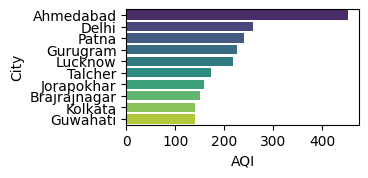

In [29]:
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city

plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

In [7]:
#segregating dates into months and years

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

In [33]:

#segregating dates into months and years

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

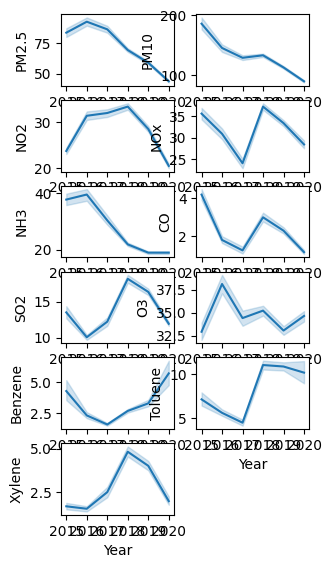

In [34]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(3.2,6.5))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

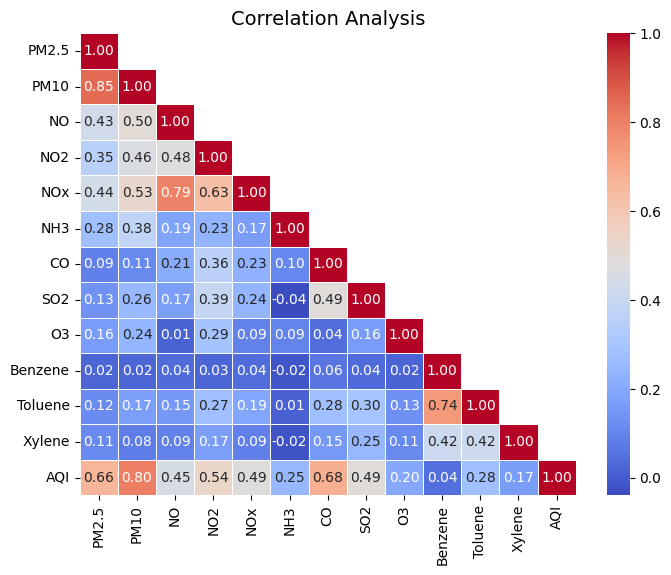

In [35]:
plt.figure(figsize=(8, 6))  # Increase figure size for readability

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Create an upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot the heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            mask=mask, 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=True)

plt.title('Correlation Analysis', fontsize=14)
plt.show()

In [36]:
import torch# Check PyTorch version and MPS availability
print(f"PyTorch version: {torch.__version__}")
print(f"MPS (Apple Silicon GPU) available: {torch.backends.mps.is_available()}")
print(f"MPS backend built: {torch.backends.mps.is_built()}")

# Set the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

PyTorch version: 2.6.0
MPS (Apple Silicon GPU) available: True
MPS backend built: True
Using device: mps


In [37]:


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Basic Feature Engineering
def prepare_data(df):
    # Select features for the model
    feature_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
    target_col = 'AQI'
    
    # Create a copy and handle missing values
    df_model = df.copy()
    df_model[feature_cols] = df_model[feature_cols].fillna(df_model[feature_cols].mean())
    df_model[target_col] = df_model[target_col].fillna(df_model[target_col].mean())
    
    # Add basic temporal features
    df_model['month'] = df_model['Date'].dt.month
    df_model['day_of_week'] = df_model['Date'].dt.dayofweek
    
    # Scale the features
    scaler = StandardScaler()
    df_model[feature_cols] = scaler.fit_transform(df_model[feature_cols])
    
    return df_model, feature_cols, target_col, scaler

# 2. Create PyTorch Dataset
class AQIDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]



Epoch [10/50]
Training Loss: 2836.5892
Testing Loss: 2395.9951

Epoch [20/50]
Training Loss: 2242.4907
Testing Loss: 1841.9385

Epoch [30/50]
Training Loss: 1836.5391
Testing Loss: 1680.0432

Epoch [40/50]
Training Loss: 1779.6543
Testing Loss: 1674.0386

Epoch [50/50]
Training Loss: 1642.7757
Testing Loss: 1439.1295



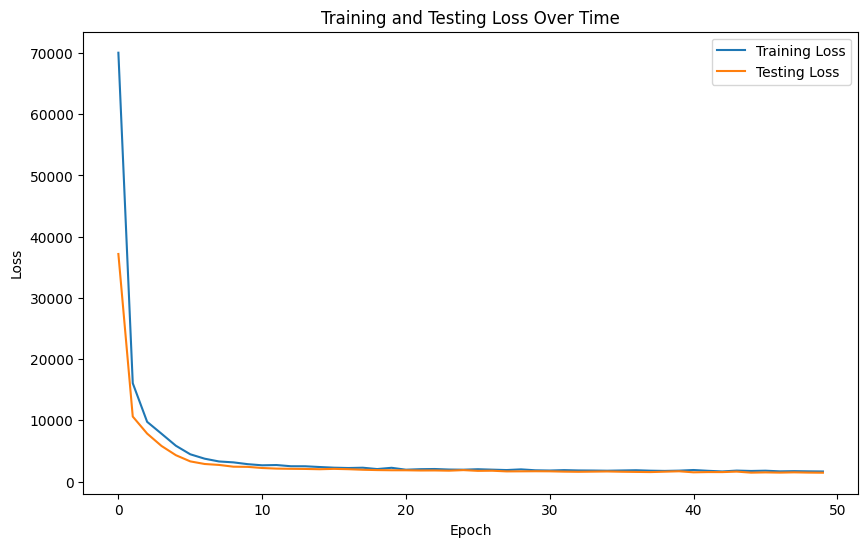

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Dataset Class
class AQIDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# 2. CNN Model with corrected dimensions
class AQICNN(nn.Module):
    def __init__(self, input_size):
        super(AQICNN, self).__init__()
        
        # Calculate the size after convolutions
        self.input_size = input_size
        
        # First Convolutional Layer
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(2)
        
        # Second Convolutional Layer
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(2)
        
        # Calculate size after convolutions and pooling
        conv_output_size = input_size
        conv_output_size = conv_output_size // 2  # After first pooling
        conv_output_size = conv_output_size // 2  # After second pooling
        self.fc_input_size = 64 * conv_output_size
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.fc2 = nn.Linear(128, 1)
        
        # Additional layers
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Add channel dimension
        x = x.unsqueeze(1)  # Shape: [batch_size, 1, input_size]
        
        # First conv block
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)
        
        # Second conv block
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool2(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# 3. Data Preparation Function
def prepare_data(df):
    feature_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
    target_col = 'AQI'
    
    df_model = df.copy()
    
    # Handle missing values
    df_model[feature_cols] = df_model[feature_cols].fillna(df_model[feature_cols].mean())
    df_model[target_col] = df_model[target_col].fillna(df_model[target_col].mean())
    
    # Scale features
    scaler = StandardScaler()
    df_model[feature_cols] = scaler.fit_transform(df_model[feature_cols])
    
    return df_model, feature_cols, target_col, scaler

# 4. Prepare city data
def prepare_city_data(df, city_name):
    city_data = df[df['City'] == city_name].copy()
    df_model, feature_cols, target_col, scaler = prepare_data(city_data)
    
    # Prepare features and target
    X = df_model[feature_cols].values
    y = df_model[target_col].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create datasets
    train_dataset = AQIDataset(X_train, y_train)
    test_dataset = AQIDataset(X_test, y_test)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    return train_loader, test_loader, len(feature_cols)

# 5. Training Function
def train_model(model, train_loader, test_loader, num_epochs=50):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        # Validation phase
        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y.unsqueeze(1))
                total_test_loss += loss.item()
        
        # Calculate average losses
        avg_train_loss = total_train_loss / len(train_loader)
        avg_test_loss = total_test_loss / len(test_loader)
        
        train_losses.append(avg_train_loss)
        test_losses.append(avg_test_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]')
            print(f'Training Loss: {avg_train_loss:.4f}')
            print(f'Testing Loss: {avg_test_loss:.4f}\n')
    
    return train_losses, test_losses

# Main execution
city_name = 'Delhi'  # Change this to your desired city
train_loader, test_loader, input_size = prepare_city_data(df, city_name)

# Initialize and train model
model = AQICNN(input_size)
train_losses, test_losses = train_model(model, train_loader, test_loader)



plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Time')
plt.legend()
plt.show()